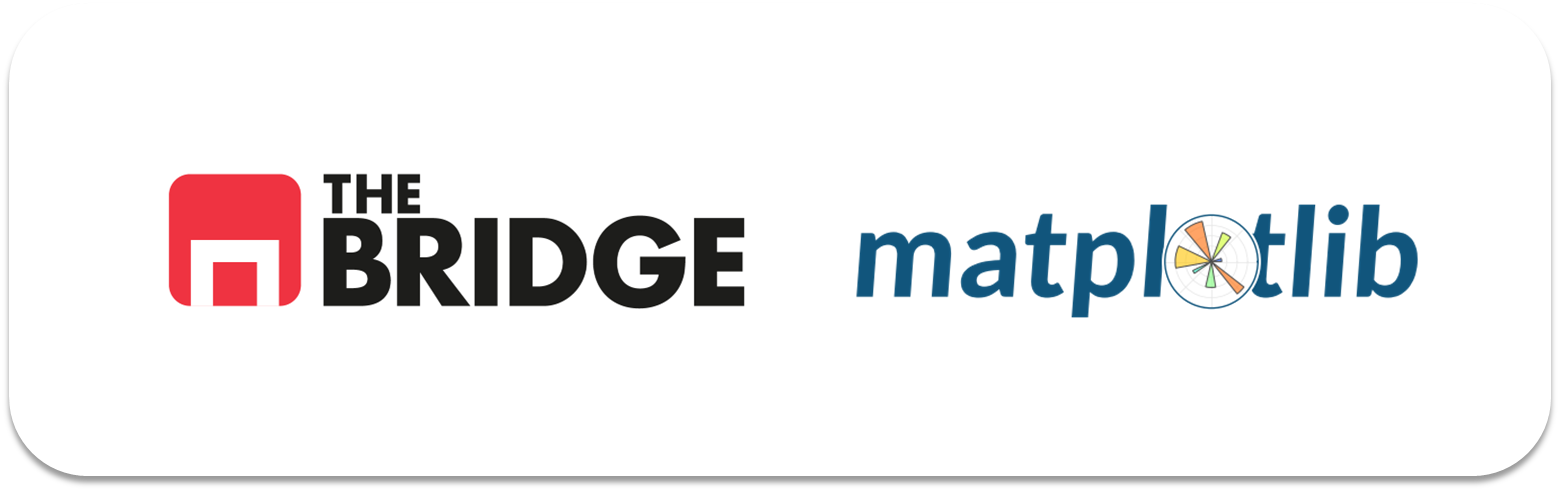

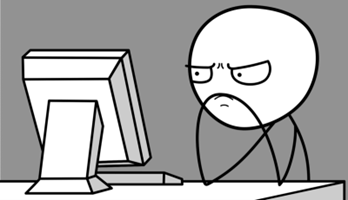

Para ejercitarte y afianzar lo aprendido sobre gráficas de Matplotlib, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Ejercicio 1


Carga tu qerido dataset del titanic, en la ruta "./data/titanic.csv", no hace falta que hagas limpieza.

In [3]:
df=pd.read_csv('./data/titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Ejercicio 2



Crea el histograma de la variable `age` de forma que se reproduzca la siguiente figura (tiene 30 bines)

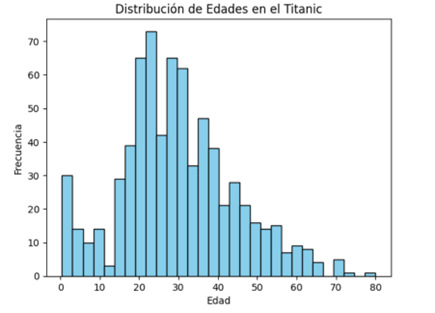

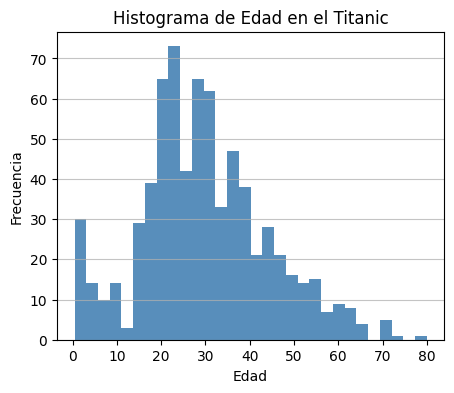

In [14]:


# Crear el histograma de la variable 'age' con 30 bines
plt.figure(figsize=(5, 4))
plt.hist(df['age'].dropna(), bins=30, alpha=0.9, color='steelblue')
plt.title('Histograma de Edad en el Titanic')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()


### Ejercicio 3

¿Cuáles son los 3 intervalos de valores con mayor número de viajeros según el gráfico anterior? ¿Obtén también el número de viajeros en cada uno?

In [15]:
# Calcular el histograma
hist, bin_edges = np.histogram(df['age'].dropna(), bins=30)

# Crear un DataFrame para los intervalos y las frecuencias
intervalos = pd.DataFrame({'Intervalo': [f"{bin_edges[i]} - {bin_edges[i+1]}" for i in range(len(bin_edges)-1)],
                           'Frecuencia': hist})

# Obtener los 3 intervalos con mayor frecuencia
top_3 = intervalos.nlargest(3, 'Frecuencia')

print(top_3)


                                  Intervalo  Frecuencia
8   21.641333333333336 - 24.294000000000004          73
7   18.988666666666667 - 21.641333333333336          65
10   26.94666666666667 - 29.599333333333334          65


### Ejercicio 4

Obten el diagrama de caja del precio del billete usando las funciones de matplotlib y reproduciendo la siguiente figura (tendrás que bucear un poco en los parámetros, y usar patch_artist = True, el tamaño de los bigotes está ajustado a 3 IQRs):

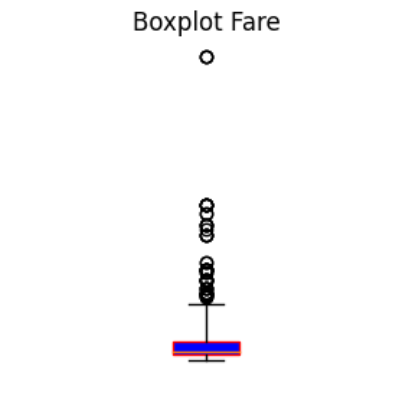

In [ ]:
plt.boxplot(df['fare'],whis=3)
plt.title('Boxplot Fare')
plt.xlabel('')
plt.ylabel('');

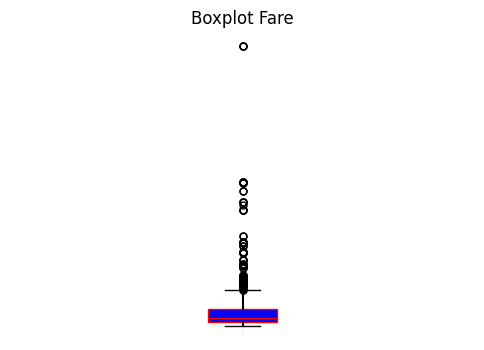

In [28]:

# Crear un diagrama de caja para el precio del billete
plt.figure(figsize=(6, 4))
plt.title('Boxplot Fare')# Ajustar el tamaño de la figura
box = plt.boxplot(df['fare'], patch_artist=True, flierprops=dict(marker='o', color='red', markersize=5), 
                  boxprops=dict(facecolor='blue', color='red'), 
                  whiskerprops=dict(color='black', linewidth=1.5),
                  capprops=dict(color='black'), 
                  medianprops=dict(color='red'))

# Ajustar los bigotes
for whisker in box['whiskers']:
    whisker.set_linewidth(1.5)

# Configurar el gráfico
plt.xticks([])  # Eliminar las etiquetas del eje x
plt.yticks([])  # Eliminar las etiquetas del eje y
plt.gca().spines['top'].set_visible(False)  # Eliminar el recuadro superior
plt.gca().spines['right'].set_visible(False)  # Eliminar el recuadro derecho
plt.gca().spines['left'].set_visible(False)  # Eliminar el recuadro izquierdo
plt.gca().spines['bottom'].set_visible(False)  # Eliminar el recuadro inferior

# Mostrar el gráfico
plt.show()


### Ejercicio 5

Crea el gráfico de frecuencias absolutas y relativas de las ciudades de embarque del Titanic de forma que repodruzcan la siguiente figura:

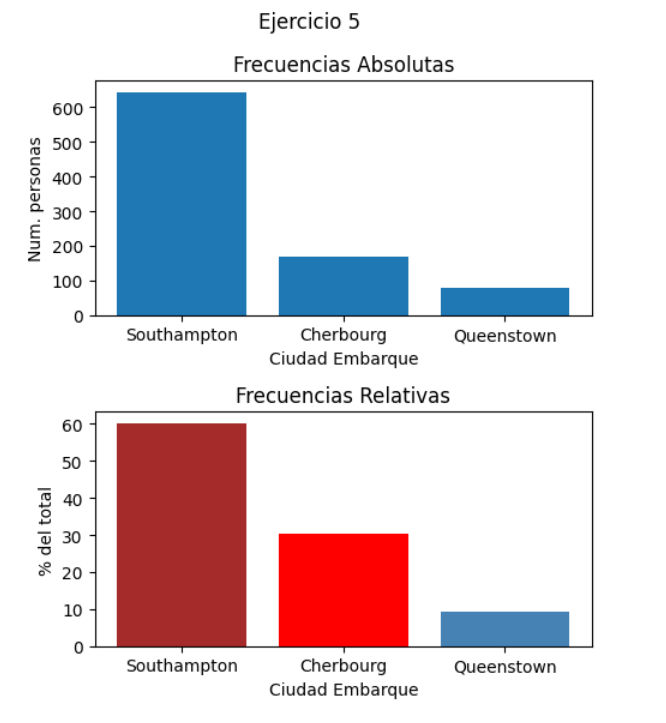

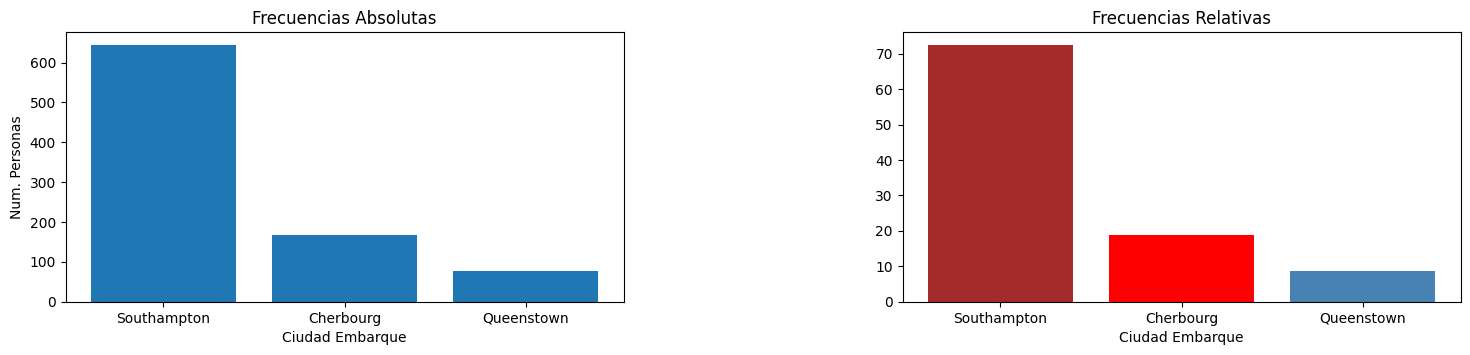

In [48]:
categorias= df.embark_town.value_counts().index.to_list()
frecuencia=df.embark_town.value_counts().to_list()
frec_relativas=(df.embark_town.value_counts(normalize=True)*100).to_list()
fig,ax=plt.subplots(1,2,figsize=(18,3.5))
fig.subplots_adjust(wspace=0.5)
ax[0].bar(categorias,frecuencia)
ax[0].set_title('Frecuencias Absolutas')
ax[0].set_xlabel('Ciudad Embarque')
ax[0].set_ylabel('Num. Personas')
ax[1].bar(categorias, frec_relativas, color = ['brown', 'red', 'steelblue'])
ax[1].set_title('Frecuencias Relativas')
ax[1].set_xlabel('Ciudad Embarque')
ax[1].set_label('% del total');


### Ejercicio 6

Crea el gráfico de dispersión entre el precio y la edad, de forma que reproduzca el siguiente gráfico (tendrás que emplear el argumento alpa)

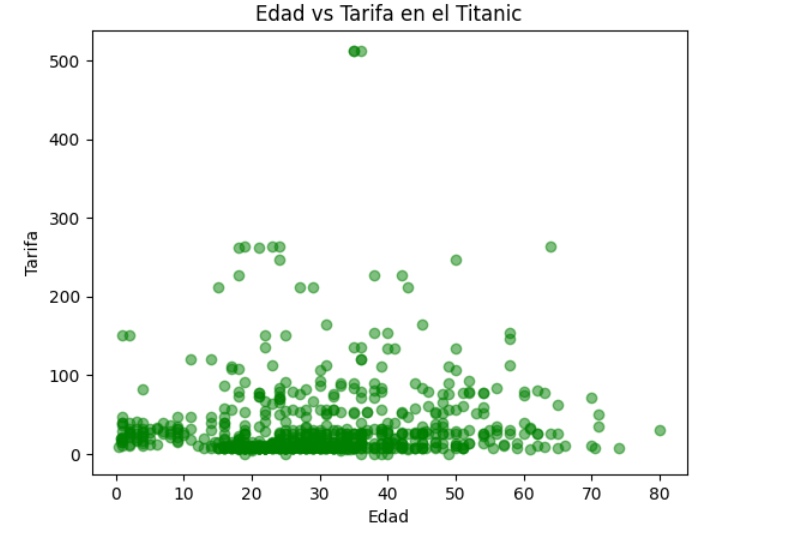

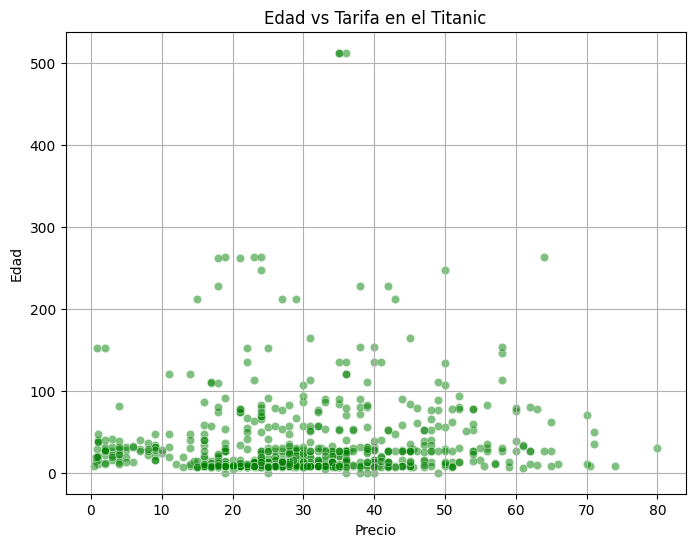

In [65]:
import seaborn as sns

# Crear el gráfico de dispersión usando seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='fare', alpha=0.5, color = 'green')

# Añadir etiquetas y título
plt.title('Edad vs Tarifa en el Titanic')
plt.xlabel('Precio')
plt.ylabel('Edad')

# Mostrar el gráfico
plt.grid()
plt.show()


### Ejercicio 7

Vamos a obtener el precio medio por edad, de la siguiente forma agrupa por edad y calcula la media de la tarifa, luego haz lo mismo pero calculando la desviación de estándar. Guarda los resultados en dos variables distintas.

In [68]:
mean_fare_by_age = df.groupby('age')['fare'].mean()

std_fare_by_age = df.groupby('age')['fare'].std()


mean_fare = mean_fare_by_age
std_fare = std_fare_by_age


### Ejercicio 8

Considerando las medias como un conjunto de medidas y las desviaciones como el error de las mismas construye un diagrama de errores que reproduzca la siguiente figura, usando (£) como moneda:

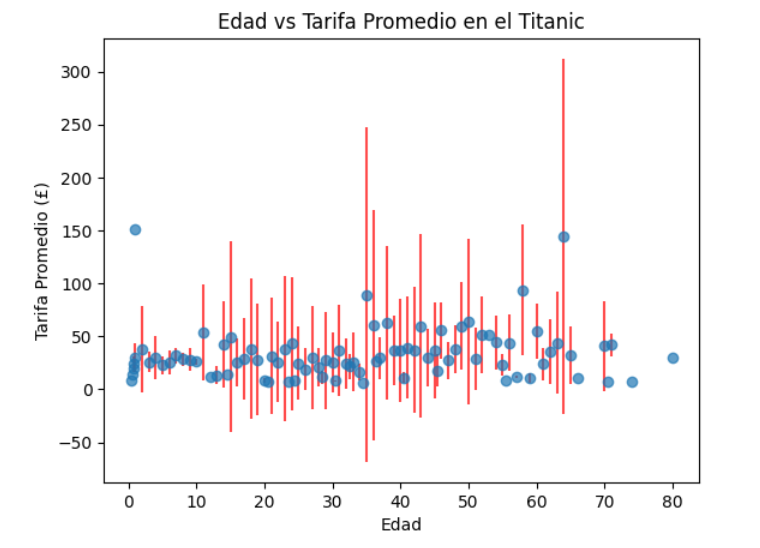

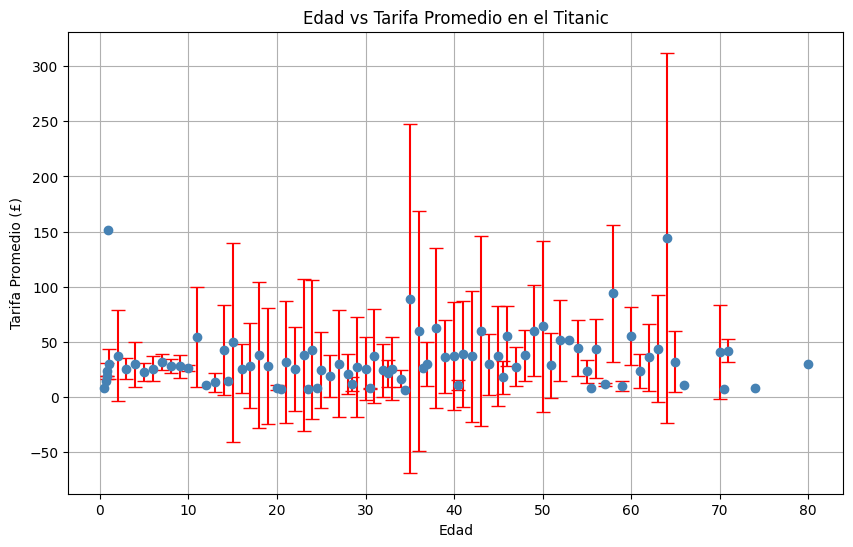

In [75]:
import matplotlib.pyplot as plt

# Crear el diagrama de errores
plt.figure(figsize=(10, 6))
plt.errorbar(mean_fare.index, mean_fare.values, yerr=std_fare.values, fmt='o', color='steelblue', ecolor='red', capsize=5)
plt.title('Edad vs Tarifa Promedio en el Titanic')
plt.xlabel('Edad')
plt.ylabel('Tarifa Promedio (£)')
plt.grid()
plt.show()



EXTRA: Pinta los cuatro primeros gráficos conjuntamente en una sóla figura como la que ves a continuación:

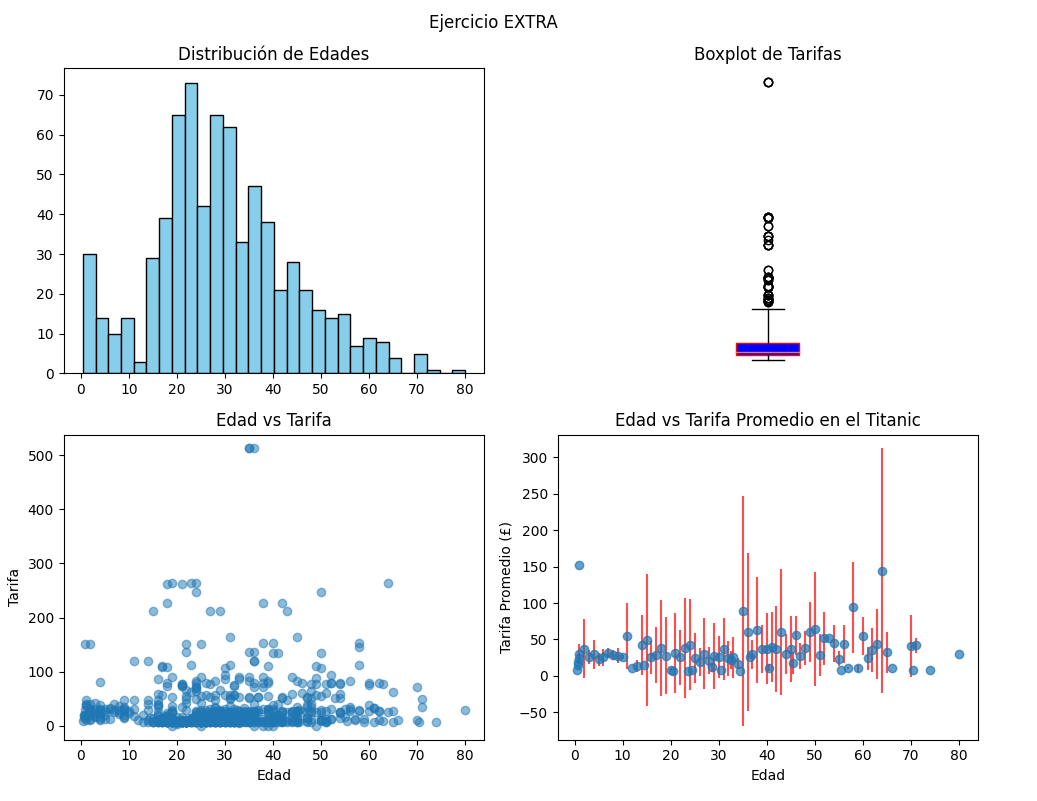

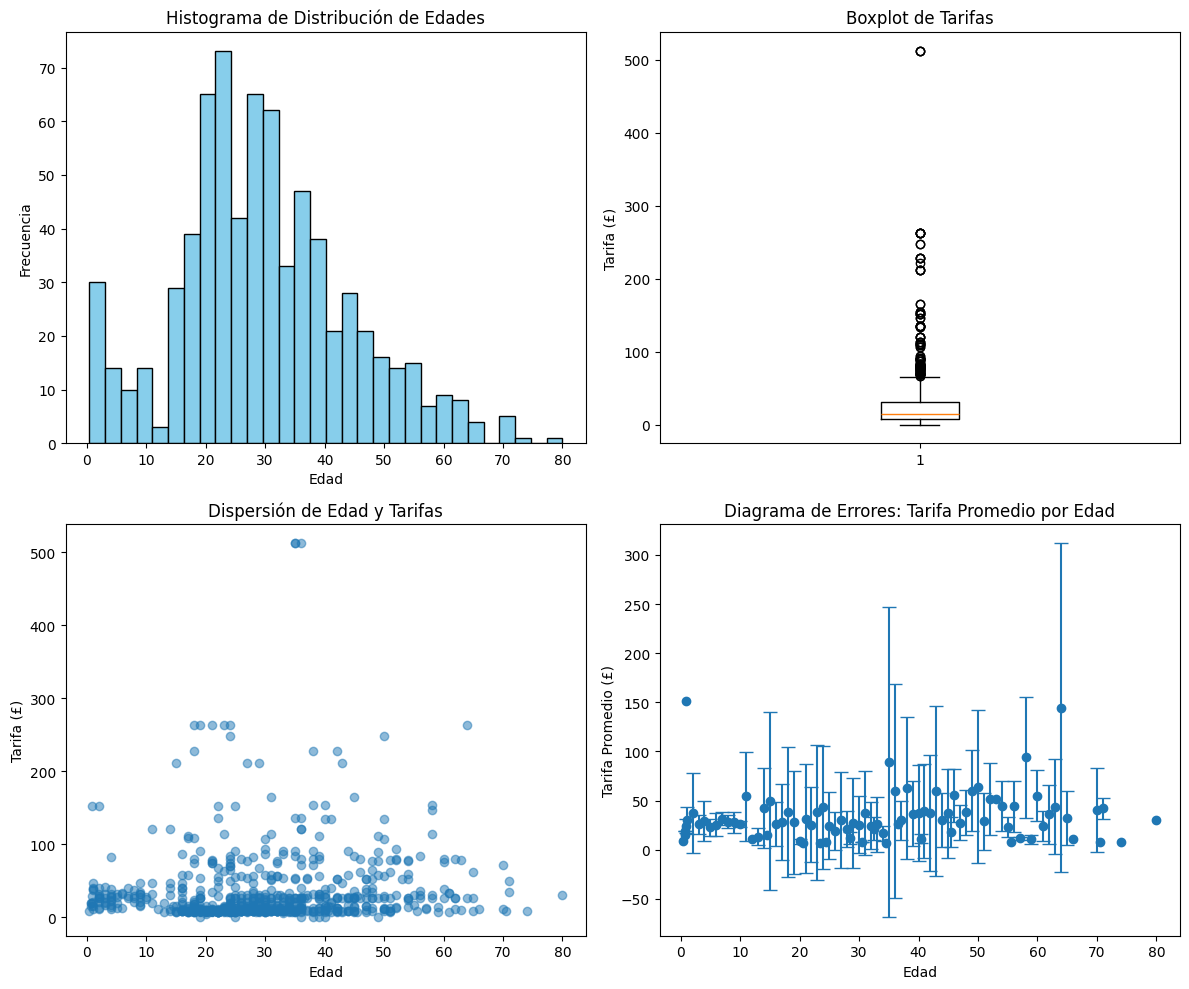

In [77]:
# Crear la figura y los ejes
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 1. Histograma de distribución de edades
axs[0, 0].hist(df['age'].dropna(), bins=30, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Histograma de Distribución de Edades')
axs[0, 0].set_xlabel('Edad')
axs[0, 0].set_ylabel('Frecuencia')

# 2. Boxplot vertical de tarifas
axs[0, 1].boxplot(df['fare'].dropna(), vert=True)
axs[0, 1].set_title('Boxplot de Tarifas')
axs[0, 1].set_ylabel('Tarifa (£)')

# 3. Diagrama de dispersión de edad y tarifas
axs[1, 0].scatter(df['age'], df['fare'], alpha=0.5)
axs[1, 0].set_title('Dispersión de Edad y Tarifas')
axs[1, 0].set_xlabel('Edad')
axs[1, 0].set_ylabel('Tarifa (£)')

# 4. Gráfico de barras de errores
axs[1, 1].errorbar(mean_fare.index, mean_fare.values, yerr=std_fare.values, fmt='o', capsize=5)
axs[1, 1].set_title('Diagrama de Errores: Tarifa Promedio por Edad')
axs[1, 1].set_xlabel('Edad')
axs[1, 1].set_ylabel('Tarifa Promedio (£)')

# Ajustar el layout
plt.tight_layout()
plt.show()
